Using the intro: https://www.kaggle.com/startupsci/titanic-data-science-solutions/code

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

Loading in training data in pandas dataframe

In [2]:
train_df = pd.read_csv('./data/train.csv')

print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


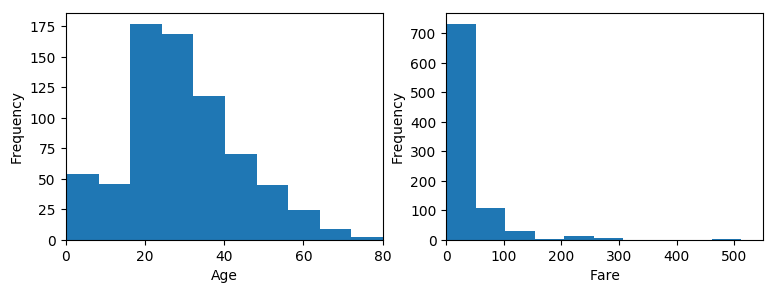

In [3]:
Ages = train_df['Age'].values
# Remove NaNs
Ages = Ages[Ages == Ages]

Fares = train_df['Fare'].values
# Remove NaNs
Fares = Fares[Fares == Fares]

fig = plt.figure(figsize=(9,3),dpi = 100)
ax1 = fig.add_subplot(121)
ax1.set_xlim(0,80)
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
ax1.hist(Ages)

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Fare")
ax2.set_ylabel("Frequency")
ax2.set_xlim(0,550)
ax2.hist(Fares);
# Who is this mug paying >400 quid for a boat trip?

Male versus female survival ratio

In [4]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


Name and name-survival rate

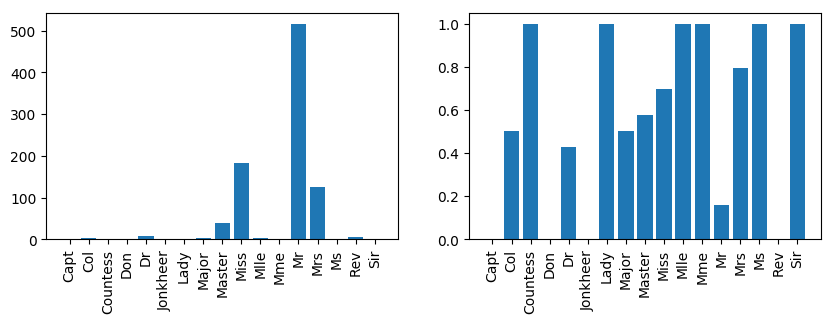

In [61]:
Titles = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
Titles = np.unique(Titles,return_counts=True)

fig = plt.figure(figsize=(10,3),dpi = 100)
ax1 = fig.add_subplot(121)
ax1.bar(Titles[0],Titles[1])
ax1.tick_params(axis="x",rotation=90);

train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
TitleSurvival = train_df[['Title', 'Survived']].groupby(['Title']).mean()

ax2 = fig.add_subplot(122)
ax2.bar(TitleSurvival.index.values.T,TitleSurvival.values.T[0])
ax2.tick_params(axis="x",rotation=90);

